In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\migraine_data2\migraine_prediction_dataset.csv")

In [3]:
print(df)


     Age  Gender  Migraine_Frequency  Warning_Signs_Before  Sleep_Trigger  \
0     57       1                   2                     1              0   
1     25       0                   1                     2              1   
2     46       0                   3                     1              1   
3     37       1                   1                     1              1   
4     45       0                   1                     2              1   
..   ...     ...                 ...                   ...            ...   
995   38       1                   0                     2              1   
996   33       0                   3                     1              1   
997   40       1                   3                     2              0   
998   44       1                   3                     2              1   
999   15       0                   4                     1              1   

     Duration_of_Migraine  Takes_Medicine  Feels_Dizzy_Before  Caffeine_Hel

In [4]:
df


,Age,Gender,Migraine_Frequency,Warning_Signs_Before,Sleep_Trigger,Duration_of_Migraine,Takes_Medicine,Feels_Dizzy_Before,Caffeine_Helps,Water_Helps
0,57,1,2,1,0,1,0,1,0,0
1,25,0,1,2,1,1,0,0,1,0
2,46,0,3,1,1,1,1,0,0,0
3,37,1,1,1,1,0,1,1,1,1
4,45,0,1,2,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,38,1,0,2,1,3,1,1,0,0
996,33,0,3,1,1,1,0,0,1,0
997,40,1,3,2,0,3,1,1,1,1
998,44,1,3,2,1,1,1,1,1,0


In [5]:
df.head()

,Age,Gender,Migraine_Frequency,Warning_Signs_Before,Sleep_Trigger,Duration_of_Migraine,Takes_Medicine,Feels_Dizzy_Before,Caffeine_Helps,Water_Helps
0,57,1,2,1,0,1,0,1,0,0
1,25,0,1,2,1,1,0,0,1,0
2,46,0,3,1,1,1,1,0,0,0
3,37,1,1,1,1,0,1,1,1,1
4,45,0,1,2,1,2,0,0,1,0


In [6]:
df.tail()

,Age,Gender,Migraine_Frequency,Warning_Signs_Before,Sleep_Trigger,Duration_of_Migraine,Takes_Medicine,Feels_Dizzy_Before,Caffeine_Helps,Water_Helps
995,38,1,0,2,1,3,1,1,0,0
996,33,0,3,1,1,1,0,0,1,0
997,40,1,3,2,0,3,1,1,1,1
998,44,1,3,2,1,1,1,1,1,0
999,15,0,4,1,1,1,1,1,0,0


In [7]:
df.columns

Index(['Age', 'Gender', 'Migraine_Frequency', 'Warning_Signs_Before',
       'Sleep_Trigger', 'Duration_of_Migraine', 'Takes_Medicine',
       'Feels_Dizzy_Before', 'Caffeine_Helps', 'Water_Helps'],
      dtype='object')

Type
Typical aura with migraine       1868
Migraine without aura            1716
Basilar-type aura                1699
Other                            1696
Sporadic hemiplegic migraine     1655
Typical aura without migraine    1650
Familial hemiplegic migraine     1616
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_23420\4087550408.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index, palette="viridis")


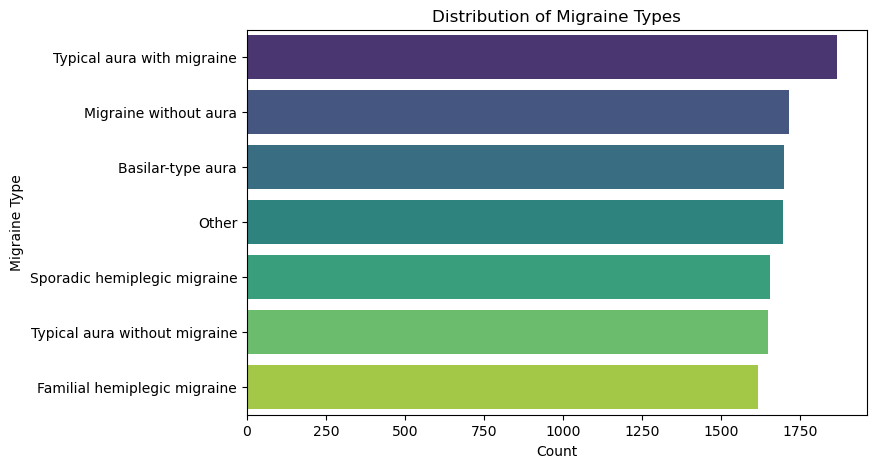

                Age      Duration     Frequency      Location     Character  \
count  11900.000000  11900.000000  11900.000000  11900.000000  11900.000000   
mean      29.405714      1.493109      2.005546      0.900252      0.919832   
std       10.940300      0.681502      1.487987      0.409423      0.436729   
min       15.000000      1.000000      1.000000      0.000000      0.000000   
25%       21.000000      1.000000      1.000000      1.000000      1.000000   
50%       25.000000      1.000000      1.000000      1.000000      1.000000   
75%       36.000000      2.000000      2.000000      1.000000      1.000000   
max       77.000000      3.000000      8.000000      2.000000      2.000000   

          Intensity        Nausea         Vomit   Phonophobia   Photophobia  \
count  11900.000000  11900.000000  11900.000000  11900.000000  11900.000000   
mean       2.215378      0.942017      0.198487      0.876303      0.897311   
std        1.061239      0.233721      0.398878    

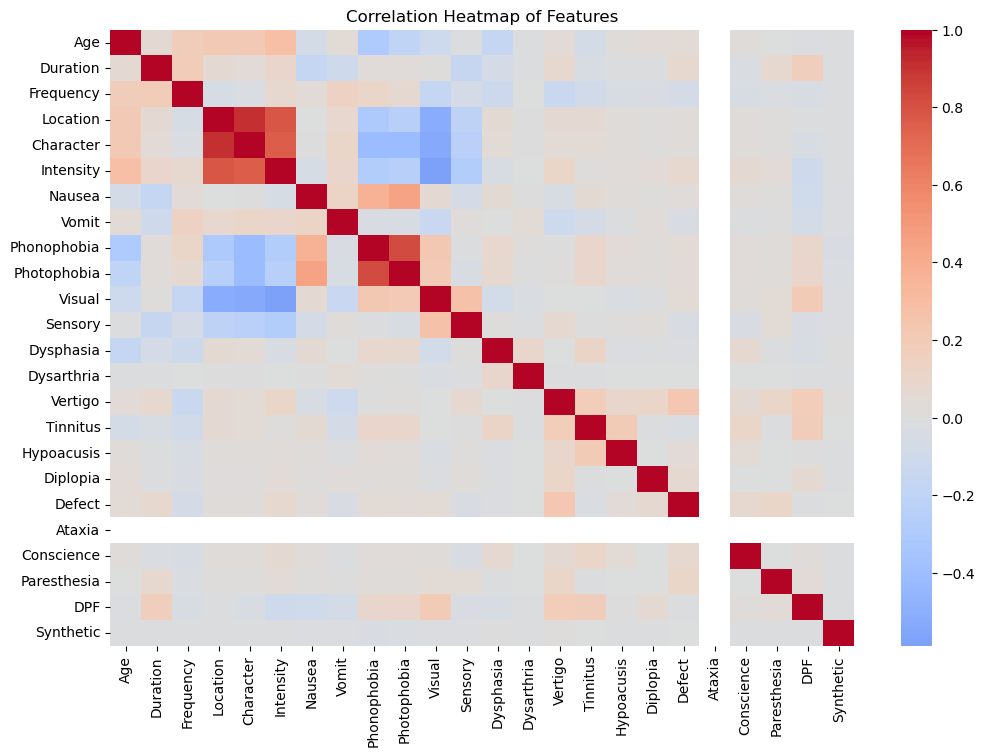

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("migraine_symptom_classification_augmented(1).csv")

# 1. Target distribution
print(df['Type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index, palette="viridis")
plt.title("Distribution of Migraine Types")
plt.xlabel("Count")
plt.ylabel("Migraine Type")
plt.show()

# 2. Summary statistics
print(df.describe())

# 3. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['Type']).corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Features and target
X = df.drop(columns=['Type'])
y = df['Type']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: scale features (useful for Logistic Regression, NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
df


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Type' column
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

print("Classes:", le.classes_)
print(df[['Type', 'Type_encoded']].head())


Classes: ['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Other' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']
                         Type  Type_encoded
0  Typical aura with migraine             5
1  Typical aura with migraine             5
2  Typical aura with migraine             5
3  Typical aura with migraine             5
4  Typical aura with migraine             5


In [12]:
df


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type,Type_encoded
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,1,Typical aura with migraine,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,1,Basilar-type aura,0
396,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,1,Basilar-type aura,0
397,28,3,2,1,1,3,1,0,1,1,...,0,0,0,1,0,0,0,1,Basilar-type aura,0
398,20,3,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,1,1,Basilar-type aura,0


In [13]:
X = df.drop(columns=['Type', 'Type_encoded'])
y = df['Type_encoded']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


Training Accuracy: 1.0
Test Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.80      0.73         5
           2       0.86      1.00      0.92        12
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       0.96      0.94      0.95        49
           6       1.00      1.00      1.00         4

    accuracy                           0.91        80
   macro avg       0.89      0.83      0.85        80
weighted avg       0.92      0.91      0.91        80



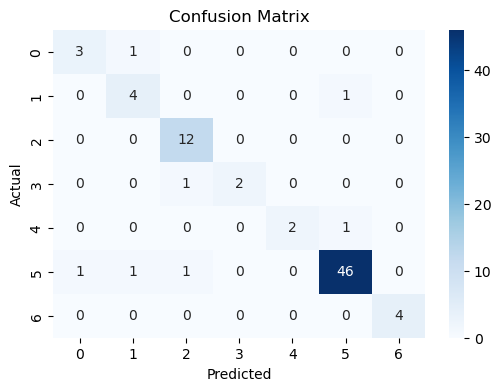

In [17]:
# Training accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Test accuracy
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Try XGBoost if available
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
except ImportError:
    print("XGBoost not installed, skipping...")


In [19]:
results = []

for name, model in models.items():
    # Use scaled data for models that need it
    if name in ["Logistic Regression", "kNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nModel Comparison:\n", results_df)



Logistic Regression Accuracy: 0.9375
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.75      0.86         4
 Familial hemiplegic migraine       0.75      0.60      0.67         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.67      0.80         3
 Sporadic hemiplegic migraine       1.00      0.67      0.80         3
   Typical aura with migraine       0.94      1.00      0.97        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.94        80
                    macro avg       0.95      0.81      0.86        80
                 weighted avg       0.94      0.94      0.93        80


kNN Accuracy: 0.8875
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.50      0.67         4
 Familial hem

C:\Users\pc\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:29:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8875
                               precision    recall  f1-score   support

            Basilar-type aura       0.33      0.25      0.29         4
 Familial hemiplegic migraine       0.57      0.80      0.67         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.67      0.80         3
 Sporadic hemiplegic migraine       1.00      0.33      0.50         3
   Typical aura with migraine       0.94      0.96      0.95        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.89        80
                    macro avg       0.82      0.72      0.74        80
                 weighted avg       0.89      0.89      0.88        80


Model Comparison:
                  Model  Accuracy
0  Logistic Regression    0.9375
1                  kNN    0.8875
2                  SVM    0.9250
3        Decision Tree    0.8375
4    

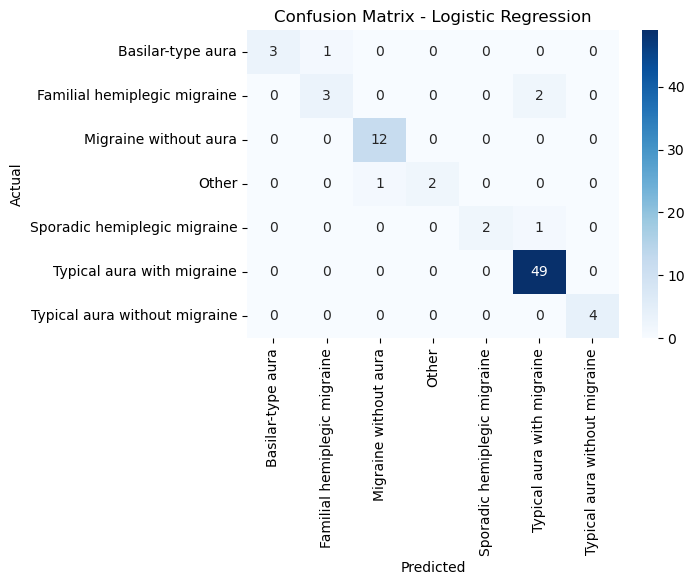

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example with Logistic Regression
y_pred = models["Logistic Regression"].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


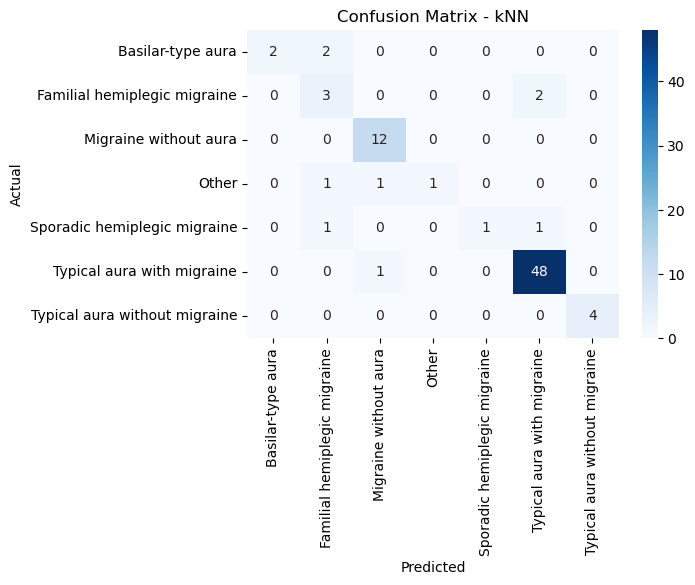

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example with Logistic Regression
y_pred = models["kNN"].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


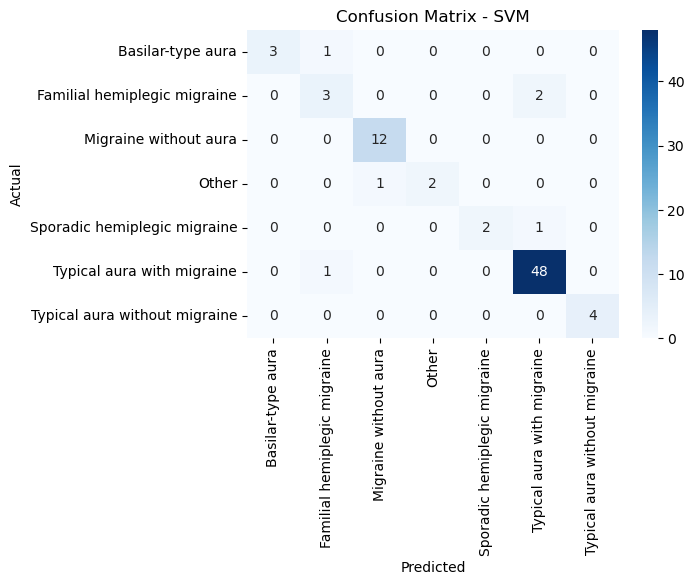

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example with Logistic Regression
y_pred = models["SVM"].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


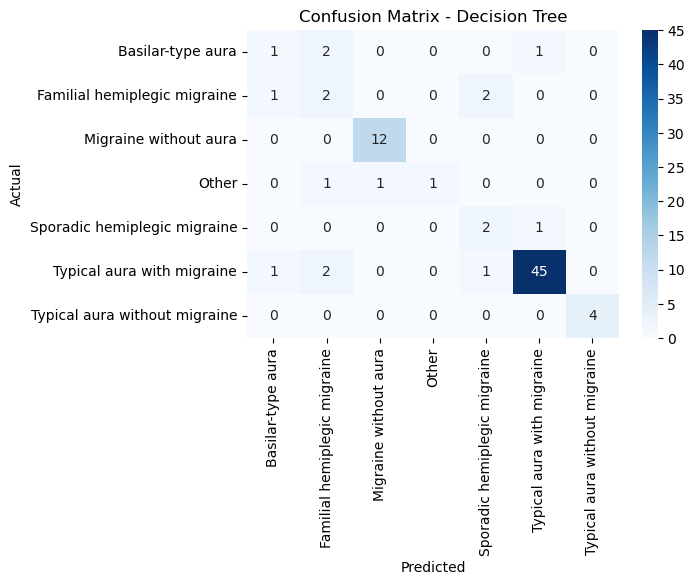

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example with Logistic Regression
y_pred = models["Decision Tree"].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


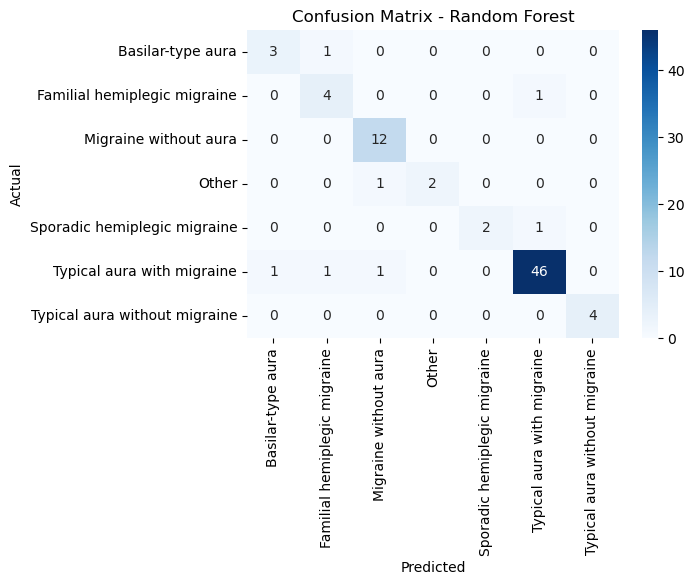

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example with Logistic Regression
y_pred = models["Random Forest"].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Logistic Regression Accuracy: 0.9375
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.75      0.86         4
 Familial hemiplegic migraine       0.75      0.60      0.67         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.67      0.80         3
 Sporadic hemiplegic migraine       1.00      0.67      0.80         3
   Typical aura with migraine       0.94      1.00      0.97        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.94        80
                    macro avg       0.95      0.81      0.86        80
                 weighted avg       0.94      0.94      0.93        80



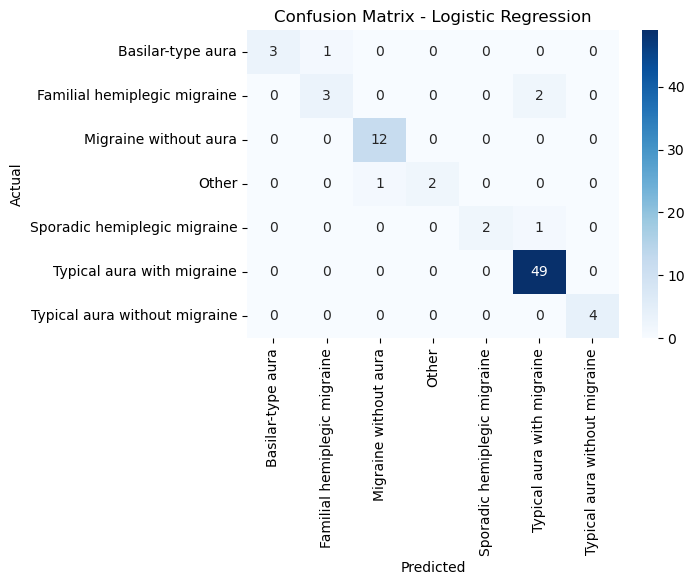


kNN Accuracy: 0.8875
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.50      0.67         4
 Familial hemiplegic migraine       0.43      0.60      0.50         5
        Migraine without aura       0.86      1.00      0.92        12
                        Other       1.00      0.33      0.50         3
 Sporadic hemiplegic migraine       1.00      0.33      0.50         3
   Typical aura with migraine       0.94      0.98      0.96        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.89        80
                    macro avg       0.89      0.68      0.72        80
                 weighted avg       0.91      0.89      0.88        80



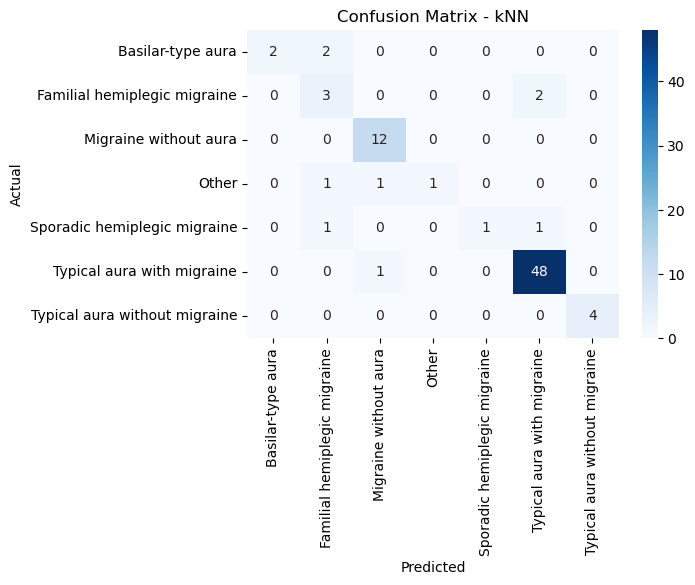


SVM Accuracy: 0.9250
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.75      0.86         4
 Familial hemiplegic migraine       0.60      0.60      0.60         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.67      0.80         3
 Sporadic hemiplegic migraine       1.00      0.67      0.80         3
   Typical aura with migraine       0.94      0.98      0.96        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.93        80
                    macro avg       0.92      0.81      0.85        80
                 weighted avg       0.93      0.93      0.92        80



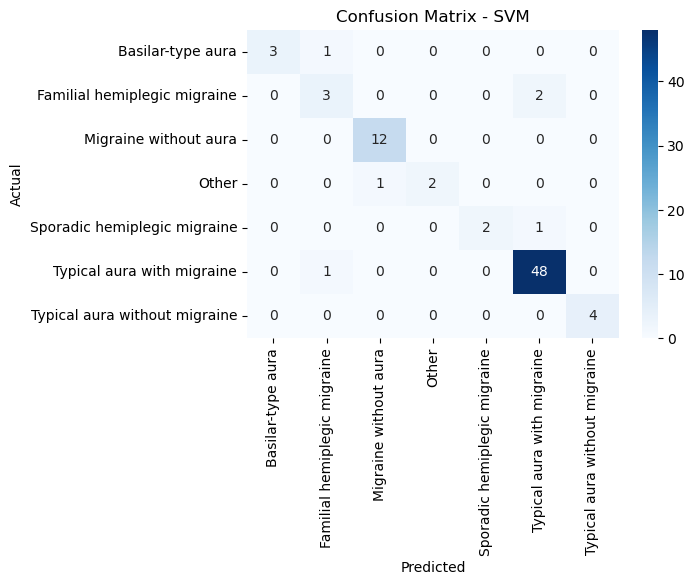


Decision Tree Accuracy: 0.8375
                               precision    recall  f1-score   support

            Basilar-type aura       0.33      0.25      0.29         4
 Familial hemiplegic migraine       0.29      0.40      0.33         5
        Migraine without aura       0.92      1.00      0.96        12
                        Other       1.00      0.33      0.50         3
 Sporadic hemiplegic migraine       0.40      0.67      0.50         3
   Typical aura with migraine       0.96      0.92      0.94        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.84        80
                    macro avg       0.70      0.65      0.65        80
                 weighted avg       0.86      0.84      0.84        80



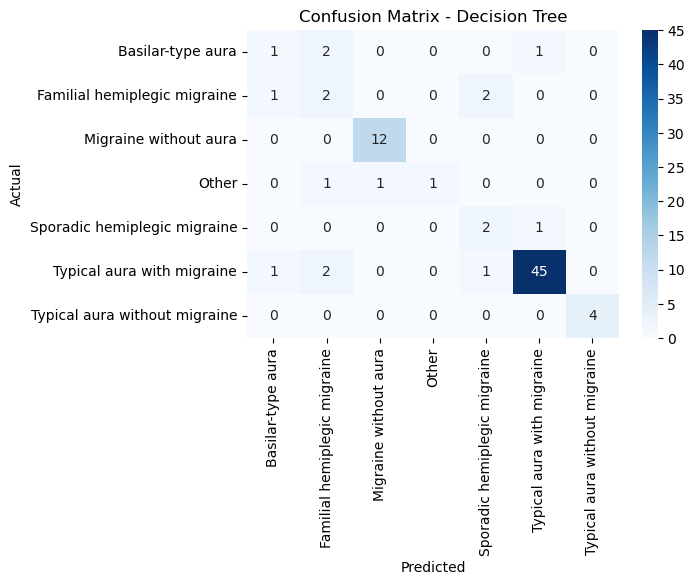


Random Forest Accuracy: 0.9125
                               precision    recall  f1-score   support

            Basilar-type aura       0.75      0.75      0.75         4
 Familial hemiplegic migraine       0.67      0.80      0.73         5
        Migraine without aura       0.86      1.00      0.92        12
                        Other       1.00      0.67      0.80         3
 Sporadic hemiplegic migraine       1.00      0.67      0.80         3
   Typical aura with migraine       0.96      0.94      0.95        49
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.91        80
                    macro avg       0.89      0.83      0.85        80
                 weighted avg       0.92      0.91      0.91        80



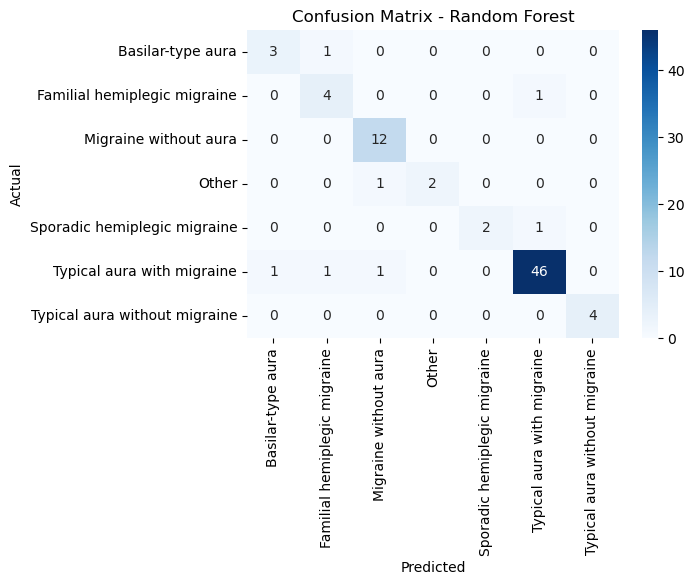


Model Comparison:
                  Model  Accuracy
0  Logistic Regression    0.9375
1                  kNN    0.8875
2                  SVM    0.9250
3        Decision Tree    0.8375
4        Random Forest    0.9125


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------
# Step 1: Load & Preprocess
# ----------------------
df = pd.read_csv(r"C:\Users\pc\Downloads\migraine_data\migraine_symptom_classification.csv")

# Encode target
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

X = df.drop(columns=['Type', 'Type_encoded'])
y = df['Type_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaler for ML models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------
# Step 2: Define models
# ----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# ----------------------
# Step 3: Train & Evaluate
# ----------------------
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "kNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # ----------------------
    # Confusion Matrix
    # ----------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ----------------------
# Step 4: Model Comparison
# ----------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nModel Comparison:\n", results_df)


In [26]:
df


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type,Type_encoded
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,1,Typical aura with migraine,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,1,Basilar-type aura,0
396,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,1,Basilar-type aura,0
397,28,3,2,1,1,3,1,0,1,1,...,0,0,0,1,0,0,0,1,Basilar-type aura,0
398,20,3,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,1,1,Basilar-type aura,0


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Type', 'Type_encoded'])
y = df['Type_encoded']

# Recursive Feature Elimination with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # keep top 10 features
fit = rfe.fit(X, y)

# Print selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Location', 'Character', 'Intensity', 'Visual', 'Sensory', 'Dysphasia',
       'Vertigo', 'Tinnitus', 'Hypoacusis', 'DPF'],
      dtype='object')


In [28]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type,Type_encoded
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,1,Typical aura with migraine,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,1,Basilar-type aura,0
396,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,1,Basilar-type aura,0
397,28,3,2,1,1,3,1,0,1,1,...,0,0,0,1,0,0,0,1,Basilar-type aura,0
398,20,3,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,1,1,Basilar-type aura,0


Selected Features: ['Age', 'Frequency', 'Location', 'Character', 'Intensity', 'Visual', 'Sensory', 'Vertigo', 'Tinnitus', 'DPF']
Accuracy after feature selection: 0.8625


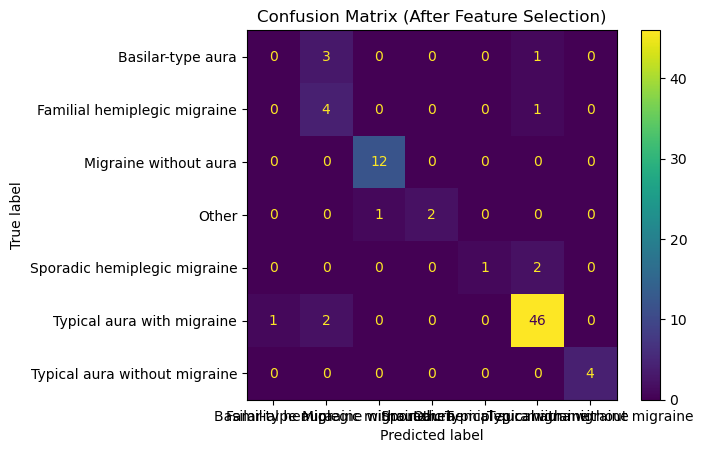

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\pc\Downloads\migraine_data\migraine_symptom_classification.csv")

# Encode target
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])

X = df.drop(columns=['Type', 'type_encoded'])
y = df['type_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# Feature Selection with RFE
# ===============================
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # keep top 10 features
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Keep only selected features
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# ===============================
# Train/Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Retrain Logistic Regression
# ===============================
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix (After Feature Selection)")
plt.show()


Selected Features: ['Age', 'Frequency', 'Location', 'Character', 'Intensity', 'Visual', 'Sensory', 'Vertigo', 'Tinnitus', 'DPF']


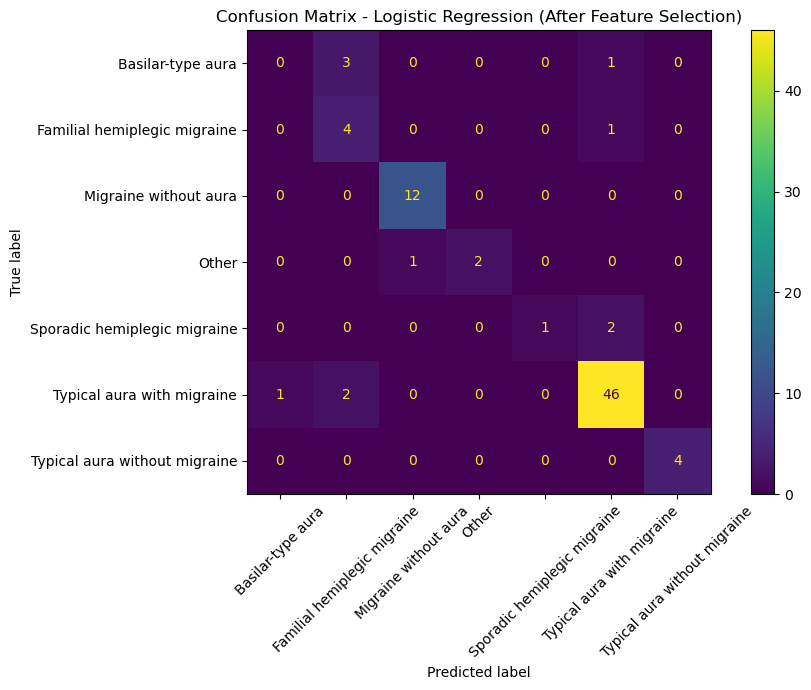

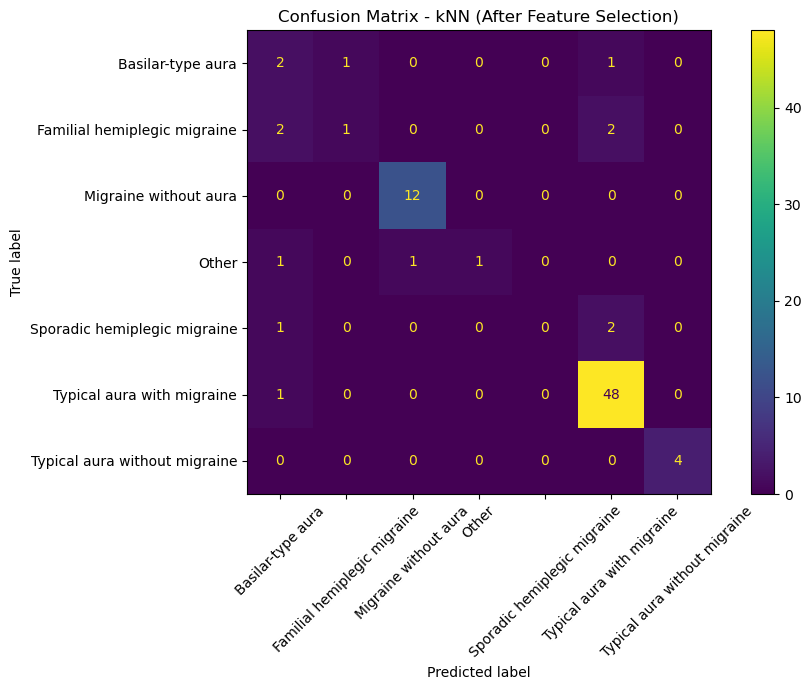

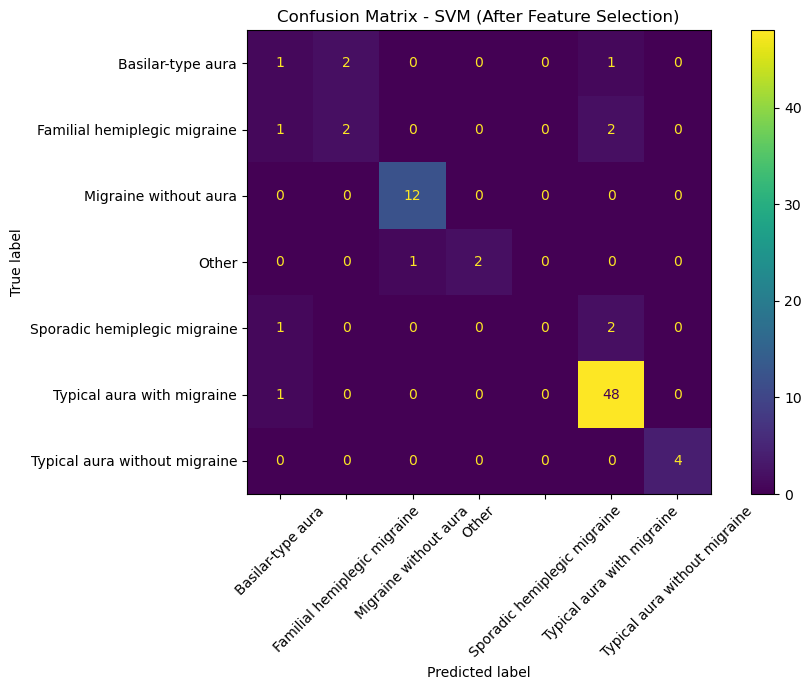

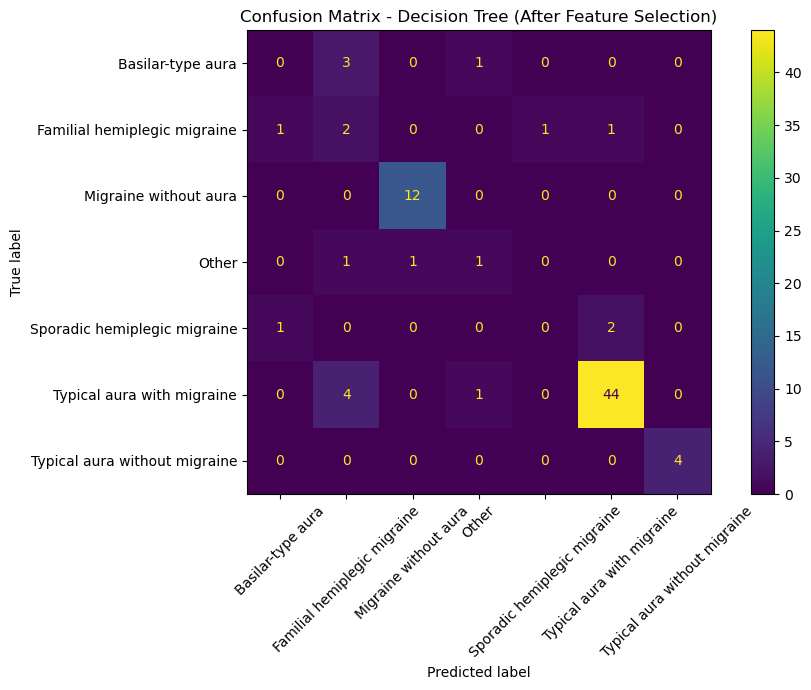

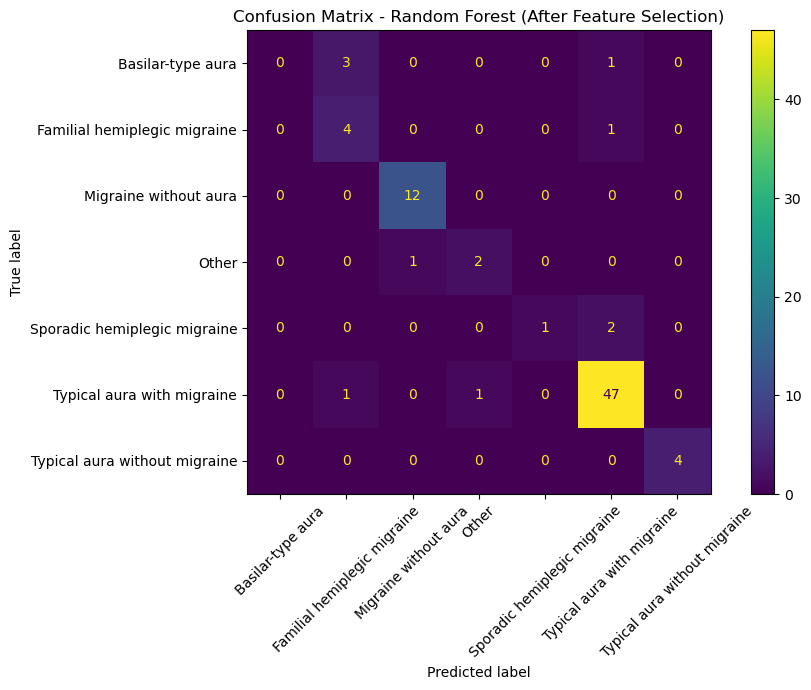


Model Comparison After Feature Selection:
                 Model  Accuracy
4        Random Forest    0.8750
0  Logistic Regression    0.8625
2                  SVM    0.8625
1                  kNN    0.8500
3        Decision Tree    0.7875


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\pc\Downloads\migraine_data\migraine_symptom_classification.csv")

# Encode target
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])

X = df.drop(columns=['Type', 'type_encoded'])
y = df['type_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================================
# Feature Selection with RFE (LogReg)
# ======================================
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # keep top 10 features
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Keep only selected features
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ======================================
# Train Models
# ======================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    # Confusion Matrix
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    
    fig, ax = plt.subplots(figsize=(10, 7))  # Bigger figure
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=45)  # Rotate x-axis labels
    plt.title(f"Confusion Matrix - {name} (After Feature Selection)")
    plt.tight_layout()
    plt.show()


# ======================================
# Results Table
# ======================================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison After Feature Selection:")
print(results_df)


In [31]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type,type_encoded
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
1,50,3,5,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
3,45,3,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,1,Typical aura with migraine,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,1,Basilar-type aura,0
396,20,3,2,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,1,Basilar-type aura,0
397,28,3,2,1,1,3,1,0,1,1,...,0,0,0,1,0,0,0,1,Basilar-type aura,0
398,20,3,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,1,1,Basilar-type aura,0


In [32]:
import pickle

# Save the final logistic regression model
with open("logistic_model_rfe.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save the scaler (used only on the 10 selected features)
with open("scaler_rfe.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the label encoder (to decode predicted classes)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Save the selected feature names
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

print("✅ Model, scaler, label encoder, and selected features saved successfully!")


✅ Model, scaler, label encoder, and selected features saved successfully!


In [33]:
# Load everything back
with open("logistic_model_rfe.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler_rfe.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)

with open("selected_features.pkl", "rb") as f:
    loaded_features = pickle.load(f)

print("Loaded model and artifacts successfully!")


Loaded model and artifacts successfully!


In [34]:
# Load selected features
import pickle

with open("selected_features.pkl", "rb") as f:
    loaded_features = pickle.load(f)

# Print the features
print("Selected Features used for training:")
print(loaded_features)


Selected Features used for training:
['Age', 'Frequency', 'Location', 'Character', 'Intensity', 'Visual', 'Sensory', 'Vertigo', 'Tinnitus', 'DPF']


In [35]:
loaded_features

['Age',
 'Frequency',
 'Location',
 'Character',
 'Intensity',
 'Visual',
 'Sensory',
 'Vertigo',
 'Tinnitus',
 'DPF']

In [36]:
# Show dataframe with only selected features
df_selected = df[selected_features]
df_selected.head()   # shows first 5 rows (like a preview)


,Age,Frequency,Location,Character,Intensity,Visual,Sensory,Vertigo,Tinnitus,DPF
0,30,5,1,1,2,1,2,0,0,0
1,50,5,1,1,3,2,1,1,0,0
2,53,1,1,1,2,2,0,0,0,0
3,45,5,1,1,3,2,2,1,0,0
4,53,1,1,1,2,4,0,0,0,1


In [37]:
df_selected

,Age,Frequency,Location,Character,Intensity,Visual,Sensory,Vertigo,Tinnitus,DPF
0,30,5,1,1,2,1,2,0,0,0
1,50,5,1,1,3,2,1,1,0,0
2,53,1,1,1,2,2,0,0,0,0
3,45,5,1,1,3,2,2,1,0,0
4,53,1,1,1,2,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,3,1,1,1,0,1
396,20,2,1,1,3,2,0,0,1,1
397,28,2,1,1,3,1,0,1,0,1
398,20,1,1,1,3,3,1,1,0,1


In [38]:
import pickle

# Save Random Forest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(models["Random Forest"], f)

# Save scaler (used on the 10 selected features)
with open("scaler_rfe.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Save selected feature names
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

print("✅ Random Forest model, scaler, label encoder, and features saved!")


✅ Random Forest model, scaler, label encoder, and features saved!


In [39]:
# Load Random Forest
with open("random_forest_model.pkl", "rb") as f:
    loaded_rf = pickle.load(f)

# Load scaler
with open("scaler_rfe.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Load label encoder
with open("label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)

# Load selected features
with open("selected_features.pkl", "rb") as f:
    loaded_features = pickle.load(f)


In [40]:
# Example new patient (order of features must match loaded_features)
new_patient = pd.DataFrame([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]], 
                           columns=loaded_features)

# Scale
new_patient_scaled = loaded_scaler.transform(new_patient)

# Predict
prediction = loaded_rf.predict(new_patient_scaled)
print("Predicted Migraine Type:", loaded_le.inverse_transform(prediction)[0])


Predicted Migraine Type: Typical aura with migraine


In [41]:
# Show mapping between encoded labels and original migraine types
for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")


0 → Basilar-type aura
1 → Familial hemiplegic migraine
2 → Migraine without aura
3 → Other
4 → Sporadic hemiplegic migraine
5 → Typical aura with migraine
6 → Typical aura without migraine


In [42]:
reverse_mapping = {label: i for i, label in enumerate(le.classes_)}
print("\nReverse mapping (Original → Encoded):")
print(reverse_mapping)


Reverse mapping (Original → Encoded):
{'Basilar-type aura': 0, 'Familial hemiplegic migraine': 1, 'Migraine without aura': 2, 'Other': 3, 'Sporadic hemiplegic migraine': 4, 'Typical aura with migraine': 5, 'Typical aura without migraine': 6}


In [43]:
# Drop rows where Type == "Other"
df = df[df['Type'] != "Other"].reset_index(drop=True)

# Re-encode the target after dropping "Other"
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])

print("Updated Classes:", le.classes_)


Updated Classes: ['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']


In [44]:
reverse_mapping = {label: i for i, label in enumerate(le.classes_)}
print("\nReverse mapping (Original → Encoded):")
print(reverse_mapping)
print(df['type_encoded'].value_counts())


Reverse mapping (Original → Encoded):
{'Basilar-type aura': 0, 'Familial hemiplegic migraine': 1, 'Migraine without aura': 2, 'Sporadic hemiplegic migraine': 3, 'Typical aura with migraine': 4, 'Typical aura without migraine': 5}
type_encoded
4    247
2     60
1     24
5     20
0     18
3     14
Name: count, dtype: int64


Classes after dropping 'Other': ['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']
Selected Features: ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity', 'Vomit', 'Visual', 'Sensory', 'Dysphasia', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF']


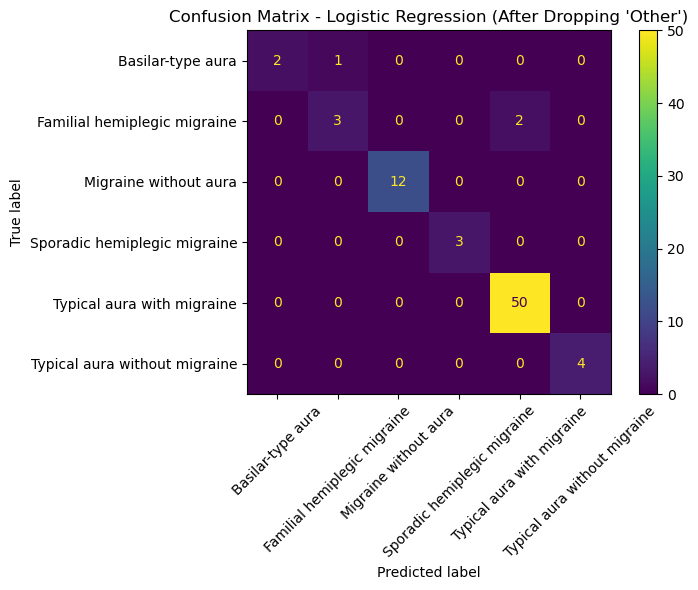

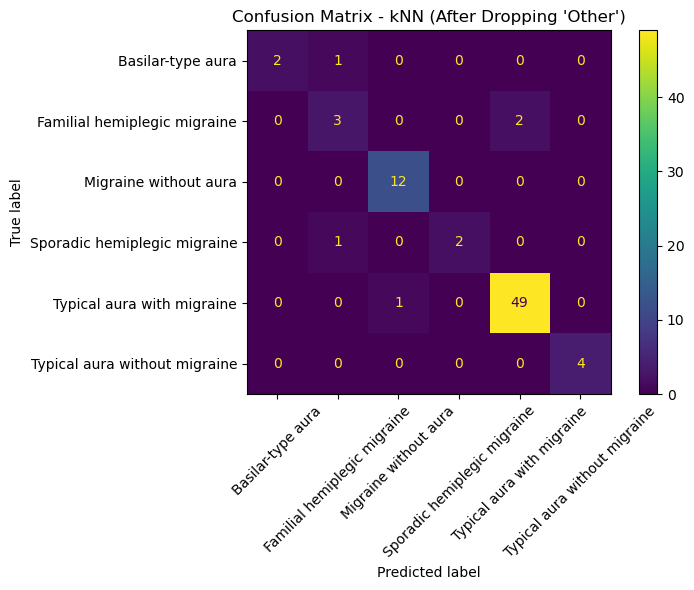

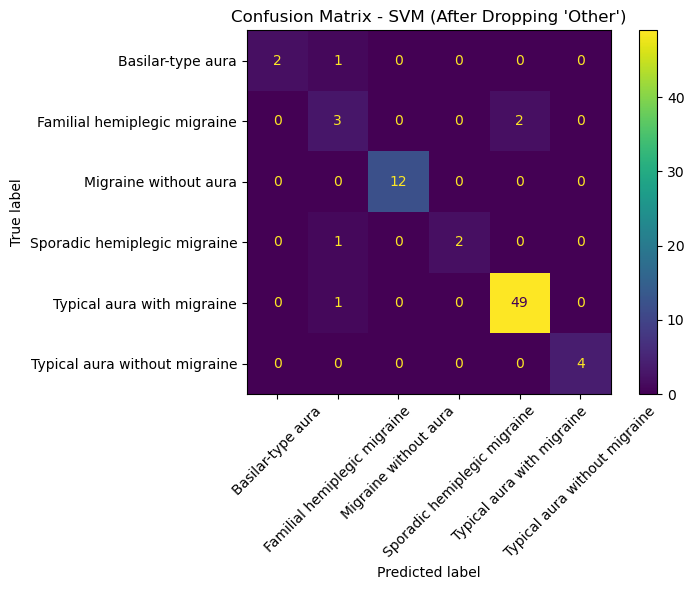

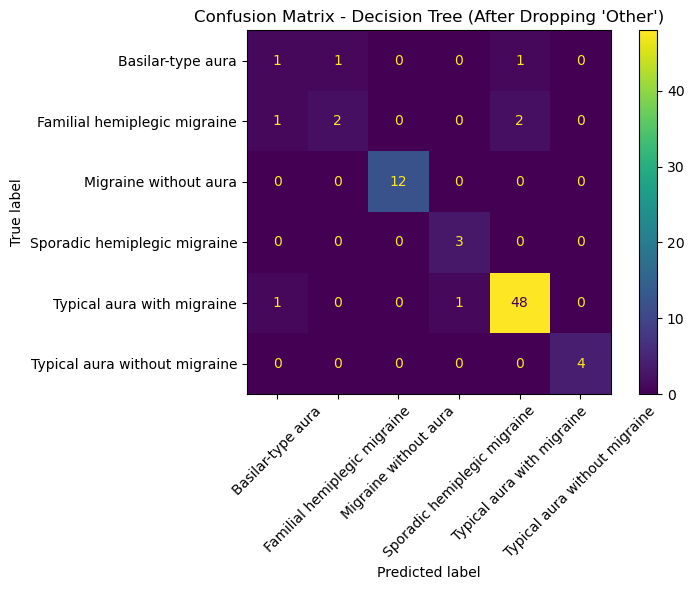

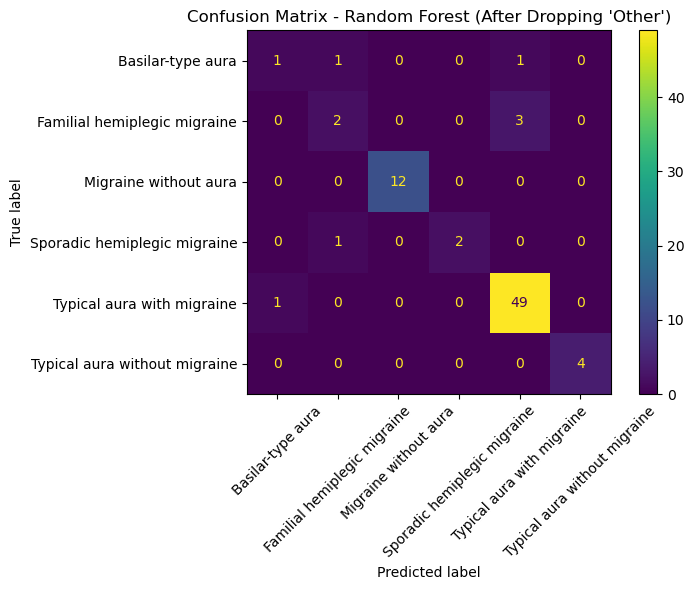


Model Comparison After Dropping 'Other':
                 Model  Accuracy
0  Logistic Regression  0.961039
1                  kNN  0.935065
2                  SVM  0.935065
3        Decision Tree  0.909091
4        Random Forest  0.909091


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ===============================
# Load dataset
# ===============================
df = pd.read_csv(r"C:\Users\pc\Downloads\migraine_data\migraine_symptom_classification.csv")

# Drop "Other" class
df = df[df['Type'] != "Other"].reset_index(drop=True)

# Encode target
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])
print("Classes after dropping 'Other':", le.classes_)

X = df.drop(columns=['Type', 'type_encoded'])
y = df['type_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# Feature Selection (RFE)
# ===============================
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=18)
rfe.fit(X_scaled, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Keep only selected features
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Train Models
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name} (After Dropping 'Other')")
    plt.tight_layout()
    plt.show()

# ===============================
# Results Table
# ===============================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison After Dropping 'Other':")
print(results_df)


In [46]:
import pickle

# Save Random Forest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(models["Random Forest"], f)

# Save scaler (used on the 10 selected features)
with open("scaler_rfe.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Save selected feature names
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

print("✅ Random Forest model, scaler, label encoder, and features saved!")


✅ Random Forest model, scaler, label encoder, and features saved!


In [47]:
# Load Random Forest
with open("random_forest_model.pkl", "rb") as f:
    loaded_rf = pickle.load(f)

# Load scaler
with open("scaler_rfe.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Load label encoder
with open("label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)

# Load selected features
with open("selected_features.pkl", "rb") as f:
    loaded_features = pickle.load(f)


In [ ]:
# After selecting features
X_selected = X[selected_features]

# Fit scaler ONLY on selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Save scaler properly
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


Selected Features: ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity', 'Vomit', 'Visual', 'Sensory', 'Dysphasia', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Defect', 'DPF']

🔹 Logistic Regression Accuracy: 0.8770


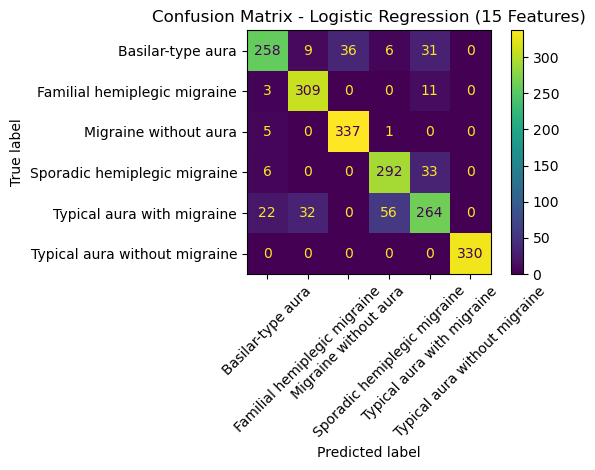


🔹 kNN Accuracy: 0.9853


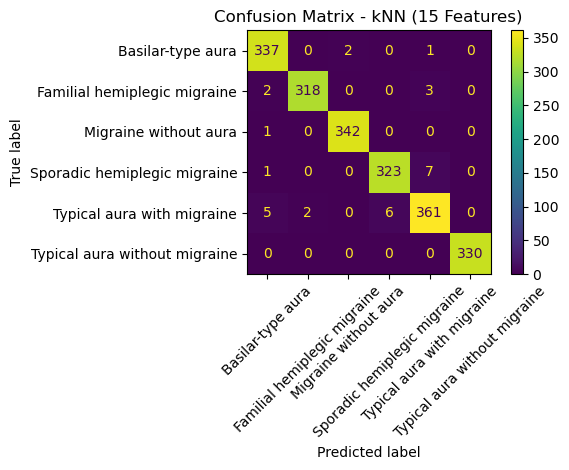


🔹 SVM Accuracy: 0.9294


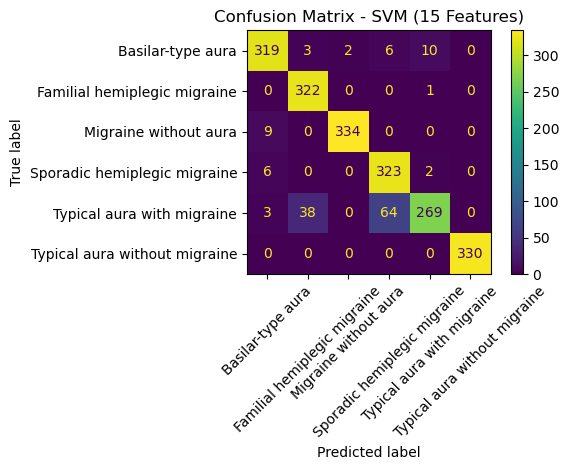


🔹 Decision Tree Accuracy: 0.9897


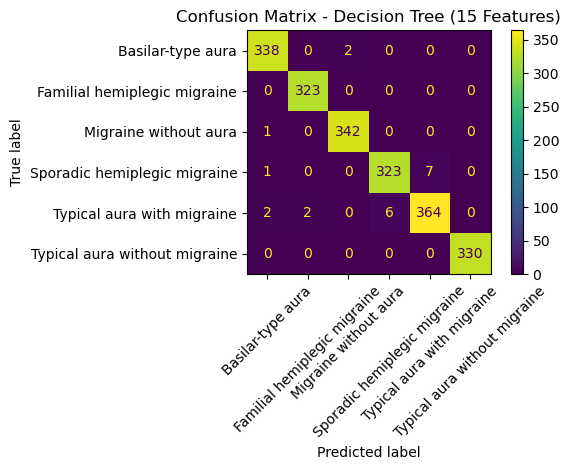


🔹 Random Forest Accuracy: 0.9907


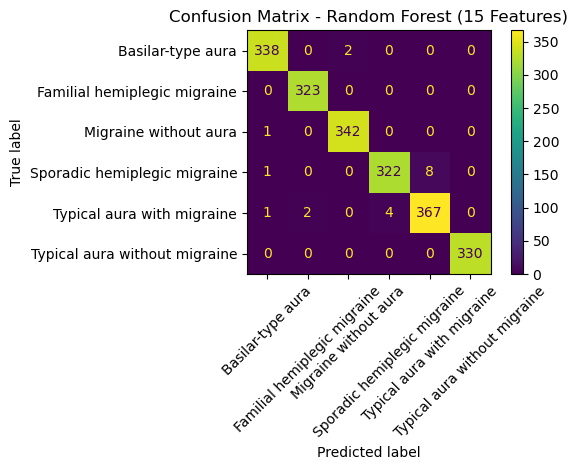


📊 Model Comparison After Feature Selection (15 Features):
                 Model  Accuracy
4        Random Forest  0.990691
3        Decision Tree  0.989711
1                  kNN  0.985301
2                  SVM  0.929446
0  Logistic Regression  0.877021

✅ Best Model (Random Forest), Scaler, Encoder, and Features saved!


In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ===============================
# Load dataset
# ===============================
df = pd.read_csv("migraine_symptom_classification_augmented(1).csv")

# Drop "Other"
df = df[df['Type'] != "Other"].reset_index(drop=True)

# Encode target
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])

X = df.drop(columns=['Type', 'type_encoded'])
y = df['type_encoded']

# ===============================
# Feature Selection (RFE)
# ===============================
log_reg = LogisticRegression(max_iter=1000)
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

rfe = RFE(log_reg, n_features_to_select=15)
rfe.fit(X_scaled_full, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Keep only selected features
X_selected = X[selected_features]

# Scale only selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Define Models
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

# ===============================
# Train & Evaluate Models
# ===============================
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    print(f"\n🔹 {name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="viridis", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name} (15 Features)")
    plt.tight_layout()
    plt.show()





# ===============================
# Results Table
# ===============================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 Model Comparison After Feature Selection (15 Features):")
print(results_df)

# ===============================
# Save Best Model (Random Forest in this case)
# ===============================
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

print(f"\n✅ Best Model ({best_model_name}), Scaler, Encoder, and Features saved!")



📊 Detailed Evaluation of Best Model: Random Forest
Accuracy  : 0.9907
Precision : 0.9907
Recall    : 0.9907
F1-Score  : 0.9907

🔎 Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.99      0.99      0.99       340
 Familial hemiplegic migraine       0.99      1.00      1.00       323
        Migraine without aura       0.99      1.00      1.00       343
 Sporadic hemiplegic migraine       0.99      0.97      0.98       331
   Typical aura with migraine       0.98      0.98      0.98       374
Typical aura without migraine       1.00      1.00      1.00       330

                     accuracy                           0.99      2041
                    macro avg       0.99      0.99      0.99      2041
                 weighted avg       0.99      0.99      0.99      2041



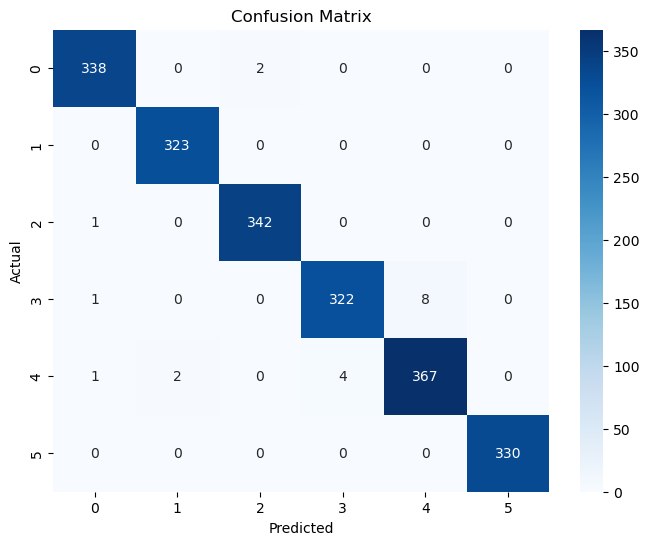

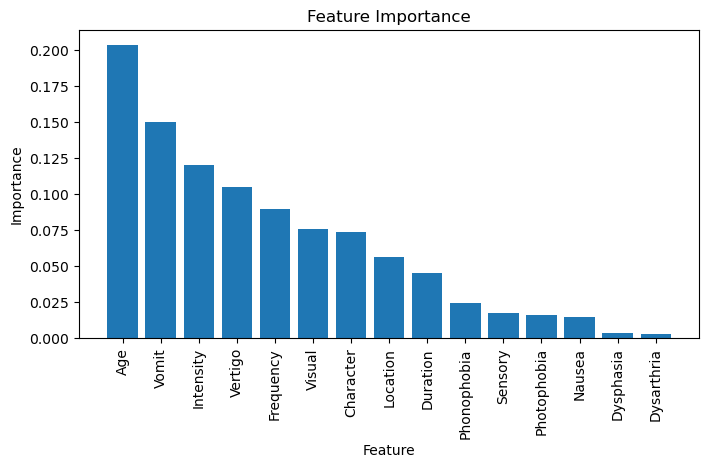

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

# ===============================
# Evaluate Best Model in Detail
# ===============================
y_pred_best = best_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_best)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_best, average="weighted")
recall = recall_score(y_test, y_pred_best, average="weighted")
f1 = f1_score(y_test, y_pred_best, average="weighted")

print("\n📊 Detailed Evaluation of Best Model:", best_model_name)
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

# Full classification report (per class metrics)
print("\n🔎 Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
    plt.xticks(range(len(feature_importances)), [X.columns[i] for i in sorted_indices], rotation=90)
    plt.title('Feature Importance')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

In [4]:
import pickle

# ===============================
# Load saved objects
# ===============================
with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

with open("selected_features.pkl", "rb") as f:
    selected_features = pickle.load(f)

print("✅ Model, Scaler, Encoder, and Features loaded!")

# ===============================
# Prediction Function
# ===============================
def predict_migraine():
    user_input = []

    # Ask user for each feature value
    for feat in selected_features:
        val = float(input(f"Enter value for {feat}: "))
        user_input.append(val)

    # Scale features
    input_scaled = scaler.transform([user_input])

    # Predict
    pred_encoded = model.predict(input_scaled)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    return f"Predicted Migraine Type: {pred_label}"


# ===============================
# Run Prediction
# ===============================
result = predict_migraine()
print(result)


✅ Model, Scaler, Encoder, and Features loaded!


Enter value for Age:  23
Enter value for Duration:  1
Enter value for Frequency:  0
Enter value for Location:  0
Enter value for Character:  2
Enter value for Intensity:  3
Enter value for Vomit:  4
Enter value for Visual:  1
Enter value for Sensory:  0
Enter value for Dysphasia:  2
Enter value for Vertigo:  3
Enter value for Tinnitus:  4
Enter value for Hypoacusis:  5
Enter value for Defect:  3
Enter value for DPF:  5


Predicted Migraine Type: Familial hemiplegic migraine


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
df_selected


NameError: name 'df_selected' is not defined

In [ ]:
df


In [ ]:
pip install xgboost


In [ ]:
pip install lightgbm


In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# ===============================
# Load dataset
# ===============================
df = pd.read_csv(r"C:\Users\pc\Downloads\migraine_data\migraine_symptom_classification.csv")

# Drop "Other"
df = df[df['Type'] != "Other"].reset_index(drop=True)

# Encode target
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['Type'])

X = df.drop(columns=['Type', 'type_encoded'])
y = df['type_encoded']

# ===============================
# Feature Selection (RFE)
# ===============================
log_reg = LogisticRegression(max_iter=1000)
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

rfe = RFE(log_reg, n_features_to_select=15)
rfe.fit(X_scaled_full, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Keep only selected features
X_selected = X[selected_features]

# Scale only selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Define Models
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
   
}

results = []

# ===============================
# Train & Evaluate Models
# ===============================
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    print(f"\n🔹 {name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="viridis", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name} (15 Features)")
    plt.tight_layout()
    plt.show()

# ===============================
# Results Table
# ===============================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 Model Comparison After Feature Selection (15 Features):")
print(results_df)

# ===============================
# Save Best Model (Random Forest in this case)
# ===============================
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

print(f"\n✅ Best Model ({best_model_name}), Scaler, Encoder, and Features saved!")


In [6]:
pip install fastapi uvicorn pydantic scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import asyncio

async def my_coroutine():
    await asyncio.sleep(1)
    print("Coroutine completed")

asyncio.create_task(my_coroutine())

<Task pending name='Task-9' coro=<my_coroutine() running at C:\Users\pc\AppData\Local\Temp\ipykernel_3860\3381249380.py:3>>

Coroutine completed


In [23]:
"""
Migraine Subtype Classification API
Version: 1.0
Base URL: /api/v1/migraine
"""

import pickle
import pandas as pd
import numpy as np
from typing import Dict, List, Optional
from pydantic import BaseModel, Field

class MigraineSymptoms(BaseModel):
    """Input schema for migraine symptom data"""
    Age: int = Field(..., ge=1, le=100, description="Patient age in years")
    Nausea: int = Field(..., ge=0, le=1, description="Nausea presence (0=No, 1=Yes)")
    Vomit: int = Field(..., ge=0, le=1, description="Vomiting presence (0=No, 1=Yes)")
    Photophobia: int = Field(..., ge=0, le=1, description="Light sensitivity (0=No, 1=Yes)")
    Phonophobia: int = Field(..., ge=0, le=1, description="Sound sensitivity (0=No, 1=Yes)")
    Visual: int = Field(..., ge=0, le=1, description="Visual disturbances (0=No, 1=Yes)")
    Sensory: int = Field(..., ge=0, le=1, description="Sensory disturbances (0=No, 1=Yes)")
    Dysphasia: int = Field(..., ge=0, le=1, description="Speech difficulties (0=No, 1=Yes)")
    Dysarthria: int = Field(..., ge=0, le=1, description="Slurred speech (0=No, 1=Yes)")
    Vertigo: int = Field(..., ge=0, le=1, description="Vertigo or dizziness (0=No, 1=Yes)")
    Intensity: int = Field(..., ge=0, le=10, description="Pain intensity (0-10 scale)")
    Duration: int = Field(..., ge=0, le=72, description="Attack duration in hours")
    Frequency: int = Field(..., ge=0, le=30, description="Monthly attack frequency")
    Location: int = Field(..., ge=0, le=2, description="0=Unilateral, 1=Bilateral, 2=Alternating")
    Character: int = Field(..., ge=0, le=2, description="0=Throbbing, 1=Pressure, 2=Stabbing")

class PredictionResult(BaseModel):
    """Output schema for prediction results"""
    migraine_type: str
    confidence: float
    probability_distribution: Dict[str, float]
    top_features: List[Dict[str, float]]
    clinical_notes: str

class MigraineClassifier:
    def __init__(self, model_path: str):
        """Initialize the classifier with serialized model components"""
        with open(f'{model_path}/best_model.pkl', 'rb') as f:
            self.model = pickle.load(f)
        with open(f'{model_path}/feature_scaler.pkl', 'rb') as f:
            self.scaler = pickle.load(f)
        with open(f'{model_path}/label_encoder.pkl', 'rb') as f:
            self.le = pickle.load(f)
        with open(f'{model_path}/selected_features.pkl', 'rb') as f:
            self.selected_features = pickle.load(f)
        
        self.feature_descriptions = {
            'Age': 'Patient age',
            'Nausea': 'Nausea presence',
            'Vomit': 'Vomiting presence',
            'Photophobia': 'Light sensitivity',
            'Phonophobia': 'Sound sensitivity',
            'Visual': 'Visual disturbances',
            'Sensory': 'Sensory disturbances',
            'Dysphasia': 'Speech difficulties',
            'Dysarthria': 'Slurred speech',
            'Vertigo': 'Vertigo or dizziness',
            'Intensity': 'Pain intensity',
            'Duration': 'Attack duration',
            'Frequency': 'Monthly frequency',
            'Location': 'Pain location',
            'Character': 'Pain character'
        }

    def preprocess_input(self, symptoms: MigraineSymptoms) -> pd.DataFrame:
        """Convert input symptoms to model-ready format"""
        input_dict = symptoms.dict()
        input_df = pd.DataFrame([input_dict])[self.selected_features]
        return self.scaler.transform(input_df)

    def predict(self, symptoms: MigraineSymptoms) -> PredictionResult:
        """Generate migraine subtype prediction with explanations"""
        # Preprocess input
        processed_input = self.preprocess_input(symptoms)
        
        # Generate prediction and probabilities
        prediction_numeric = self.model.predict(processed_input)
        probabilities = self.model.predict_proba(processed_input)
        
        # Create probability distribution
        prob_distribution = {
            self.le.inverse_transform([i]): float(prob)
            for i, prob in enumerate(probabilities)
        }
        
        # Get feature importance for this specific prediction
        feature_importance = self._get_feature_importance(processed_input)
        
        # Generate clinical notes
        clinical_notes = self._generate_clinical_notes(
            symptoms, 
            self.le.inverse_transform([prediction_numeric]),
            feature_importance
        )
        
        return PredictionResult(
            migraine_type=self.le.inverse_transform([prediction_numeric]),
            confidence=float(np.max(probabilities)),
            probability_distribution=prob_distribution,
            top_features=feature_importance,
            clinical_notes=clinical_notes
        )

    def _get_feature_importance(self, input_features: np.ndarray) -> List[Dict[str, float]]:
        """Calculate feature importance for the specific prediction"""
        feature_importance = []
        for i, feature in enumerate(self.selected_features):
            importance = abs(input_features[i] * self.model.feature_importances_[i])
            feature_description = self.feature_descriptions.get(feature, 'Unknown feature')
            feature_importance.append({
                'feature': feature,
                'importance': float(importance),
                'description': feature_description
            })
        feature

✅ Model, Scaler, Encoder, and Features loaded successfully!

📊 Detailed Evaluation of Best Model (Random Forest)
Accuracy  : 99.07%
Precision : 99.07%
Recall    : 99.07%
F1-Score  : 99.07%

🔎 Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.99      0.99      0.99       340
 Familial hemiplegic migraine       0.99      1.00      1.00       323
        Migraine without aura       0.99      1.00      1.00       343
 Sporadic hemiplegic migraine       0.99      0.97      0.98       331
   Typical aura with migraine       0.98      0.98      0.98       374
Typical aura without migraine       1.00      1.00      1.00       330

                     accuracy                           0.99      2041
                    macro avg       0.99      0.99      0.99      2041
                 weighted avg       0.99      0.99      0.99      2041



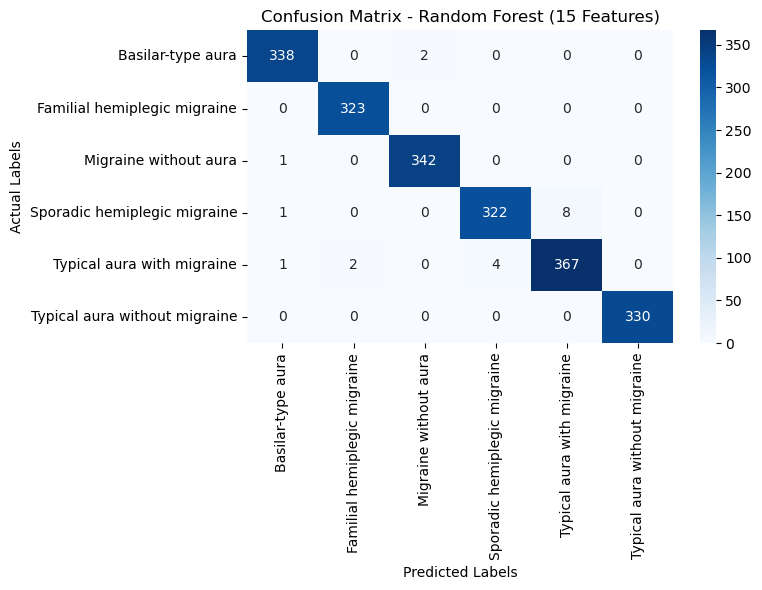

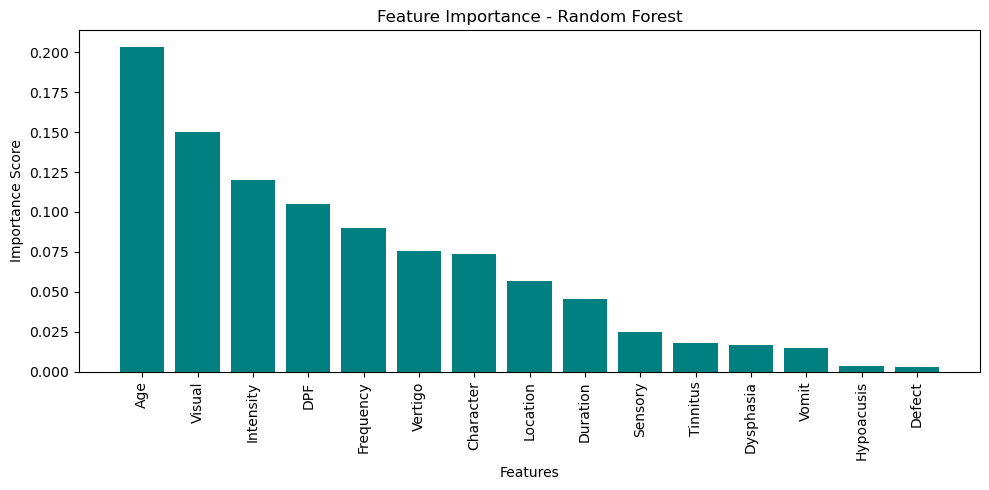


🔮 Enter symptom data to predict migraine type:



Enter value for Age:  1
Enter value for Duration:  1
Enter value for Frequency:  1
Enter value for Location:  1
Enter value for Character:  1
Enter value for Intensity:  1
Enter value for Vomit:  1
Enter value for Visual:  1
Enter value for Sensory:  1
Enter value for Dysphasia:  1
Enter value for Vertigo:  1
Enter value for Tinnitus:  1
Enter value for Hypoacusis:  1
Enter value for Defect:  1
Enter value for DPF:  1



✅ Predicted Migraine Type: Familial hemiplegic migraine


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# ===============================
# Load saved best model and utilities
# ===============================
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

with open("selected_features.pkl", "rb") as f:
    selected_features = pickle.load(f)

print("✅ Model, Scaler, Encoder, and Features loaded successfully!")

# ===============================
# Evaluate Best Model in Detail
# ===============================
y_pred_best = best_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average="weighted")
recall = recall_score(y_test, y_pred_best, average="weighted")
f1 = f1_score(y_test, y_pred_best, average="weighted")

print("\n📊 Detailed Evaluation of Best Model (Random Forest)")
print(f"Accuracy  : {acc*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1-Score  : {f1*100:.2f}%")

# Classification Report
print("\n🔎 Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# ===============================
# Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest (15 Features)', fontsize=12)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

# ===============================
# Feature Importance
# ===============================
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(6, 4))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], color='teal')
    plt.xticks(range(len(feature_importances)),
               [selected_features[i] for i in sorted_idx],
               rotation=90)
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()

# ===============================
# User Input Prediction Function
# ===============================
def predict_migraine():
    print("\n🔮 Enter symptom data to predict migraine type:\n")
    user_input = []

    for feat in selected_features:
        val = float(input(f"Enter value for {feat}: "))
        user_input.append(val)

    # Scale input
    input_scaled = scaler.transform([user_input])

    # Predict
    pred_encoded = best_model.predict(input_scaled)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    print("\n✅ Predicted Migraine Type:", pred_label)
    return pred_label


# ===============================
# Run Prediction
# ===============================
result = predict_migraine()


✅ Model, Scaler, Encoder, and Features loaded successfully!

📊 Detailed Evaluation of Best Model (Random Forest)
Accuracy  : 99.07%
Precision : 99.07%
Recall    : 99.07%
F1-Score  : 99.07%

🔎 Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.99      0.99      0.99       340
 Familial hemiplegic migraine       0.99      1.00      1.00       323
        Migraine without aura       0.99      1.00      1.00       343
 Sporadic hemiplegic migraine       0.99      0.97      0.98       331
   Typical aura with migraine       0.98      0.98      0.98       374
Typical aura without migraine       1.00      1.00      1.00       330

                     accuracy                           0.99      2041
                    macro avg       0.99      0.99      0.99      2041
                 weighted avg       0.99      0.99      0.99      2041



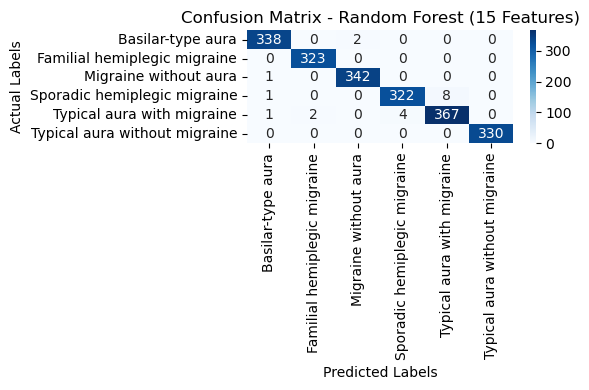

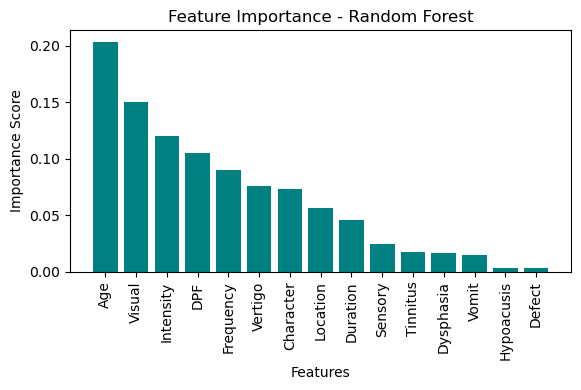


🔮 Enter symptom data to predict migraine type:



Enter value for Age:  45
Enter value for Duration:  1
Enter value for Frequency:  3
Enter value for Location:  2
Enter value for Character:  4
Enter value for Intensity:  1
Enter value for Vomit:  2
Enter value for Visual:  3
Enter value for Sensory:  4
Enter value for Dysphasia:  1
Enter value for Vertigo:  2
Enter value for Tinnitus:  3
Enter value for Hypoacusis:  4
Enter value for Defect:  1
Enter value for DPF:  2



✅ Predicted Migraine Type: Basilar-type aura

📘 Information about Basilar-type aura:
1. Originates from the brainstem, involving disturbances like vertigo, dysarthria, or double vision.
2. Commonly affects both sides of the body, unlike unilateral migraines.
3. Often accompanied by visual and auditory hallucinations.
4. Can lead to severe nausea and temporary loss of coordination.
5. Considered one of the rare and complex migraine subtypes.


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# ===============================
# Load saved best model and utilities
# ===============================
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

with open("selected_features.pkl", "rb") as f:
    selected_features = pickle.load(f)

print("✅ Model, Scaler, Encoder, and Features loaded successfully!")

# ===============================
# Evaluate Best Model in Detail
# ===============================
y_pred_best = best_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average="weighted")
recall = recall_score(y_test, y_pred_best, average="weighted")
f1 = f1_score(y_test, y_pred_best, average="weighted")

print("\n📊 Detailed Evaluation of Best Model (Random Forest)")
print(f"Accuracy  : {acc*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1-Score  : {f1*100:.2f}%")

# Classification Report
print("\n🔎 Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# ===============================
# Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest (15 Features)', fontsize=12)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

# ===============================
# Feature Importance
# ===============================
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(6, 4))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], color='teal')
    plt.xticks(range(len(feature_importances)),
               [selected_features[i] for i in sorted_idx],
               rotation=90)
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()

# ===============================
# Migraine Type Information (original human-readable entries)
# ===============================
migraine_info = {
    "Basilar-Type Aura": [
        "Originates from the brainstem, involving disturbances like vertigo, dysarthria, or double vision.",
        "Commonly affects both sides of the body, unlike unilateral migraines.",
        "Often accompanied by visual and auditory hallucinations.",
        "Can lead to severe nausea and temporary loss of coordination.",
        "Considered one of the rare and complex migraine subtypes."
    ],
    "Familial Hemiplegic Migraine": [
        "A hereditary migraine type linked to genetic mutations (CACNA1A, ATP1A2, SCN1A genes).",
        "Causes temporary paralysis or weakness on one side of the body during an attack.",
        "Often associated with aura symptoms such as speech difficulties or vision loss.",
        "Can last from several hours to days, with gradual recovery.",
        "Typically diagnosed through family medical history and genetic testing."
    ],
    "Migraine Without Aura": [
        "The most prevalent migraine subtype worldwide.",
        "Characterized by pulsating headaches, nausea, photophobia, and phonophobia.",
        "Triggers include stress, hormonal changes, lack of sleep, or dietary factors.",
        "Lacks any preceding neurological warning signs (aura).",
        "Duration ranges from 4 to 72 hours if untreated."
    ],
    "Sporadic Hemiplegic Migraine": [
        "Shares similar clinical symptoms with familial hemiplegic migraine.",
        "Occurs without any familial or genetic background.",
        "Involves unilateral motor weakness or paralysis during an attack.",
        "Neurological symptoms usually resolve completely after the episode.",
        "Diagnosis is confirmed after excluding secondary neurological causes."
    ],
    "Typical Aura With Migraine": [
        "Begins with visual or sensory aura such as flashing lights or tingling sensations.",
        "Aura symptoms usually precede headache by 20–60 minutes.",
        "The headache phase follows, often on one side of the head.",
        "Common triggers include bright light exposure and emotional stress.",
        "Usually resolves within a few hours to a day."
    ],
    "Typical Aura Without Migraine": [
        "Presence of aura symptoms without subsequent headache.",
        "Often mistaken for transient ischemic attacks or other neurological events.",
        "Involves visual disturbances like zig-zag patterns or blind spots.",
        "Episodes last less than 60 minutes, with full recovery afterward.",
        "Occurs more commonly in individuals with a history of migraine with aura."
    ]
}

# ===============================
# Build a normalized lookup map so label variations don't break lookup
# ===============================
import re

def _normalize_label(s: str) -> str:
    """Normalize labels by lowercasing and removing non-alphanumeric chars."""
    return re.sub(r'[^0-9a-z]', '', s.lower())

# Map normalized form -> original info list
normalized_info_map = {}
for key, info in migraine_info.items():
    normalized_info_map[_normalize_label(key)] = info

# Also add normalized forms of the encoder classes if they differ:
# This ensures keys that appear in le.classes_ (model labels) are covered even if
# migraine_info uses slightly different wording.
for cls_name in le.classes_:
    norm = _normalize_label(cls_name)
    if norm not in normalized_info_map:
        # try to find a migraine_info key that matches loosely (e.g. hyphen vs lowercase)
        # we'll map it to the closest migraine_info entry if possible, else leave absent
        for key in migraine_info:
            if _normalize_label(key) == norm:
                normalized_info_map[norm] = migraine_info[key]
                break
# (If no mapping found, that label will be treated as unknown later.)

# ===============================
# User Input Prediction Function (uses normalized lookup)
# ===============================
def predict_migraine():
    print("\n🔮 Enter symptom data to predict migraine type:\n")
    user_input = []

    for feat in selected_features:
        # You might want to add validation here (e.g., allowed ranges or binary options)
        val = float(input(f"Enter value for {feat}: "))
        user_input.append(val)

    # Scale input
    input_scaled = scaler.transform([user_input])

    # Predict
    pred_encoded = best_model.predict(input_scaled)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    print("\n✅ Predicted Migraine Type:", pred_label)

    # Normalize predicted label and lookup info
    norm_pred = _normalize_label(pred_label)
    info = normalized_info_map.get(norm_pred, None)

    if info:
        print(f"\n📘 Information about {pred_label}:")
        for i, point in enumerate(info, 1):
            print(f"{i}. {point}")
    else:
        # Fallback: try fuzzy match by simple substring (case-insensitive)
        found = False
        for key in migraine_info:
            if key.lower() in pred_label.lower() or pred_label.lower() in key.lower():
                print(f"\n📘 (Fuzzy-match) Information about {key}:")
                for i, point in enumerate(migraine_info[key], 1):
                    print(f"{i}. {point}")
                found = True
                break
        if not found:
            print("\n⚠️ No detailed information available for this migraine type.")

    return pred_label

# ===============================
# Run Prediction
# ===============================
result = predict_migraine()


✅ Model, Scaler, Encoder, and Features loaded successfully!


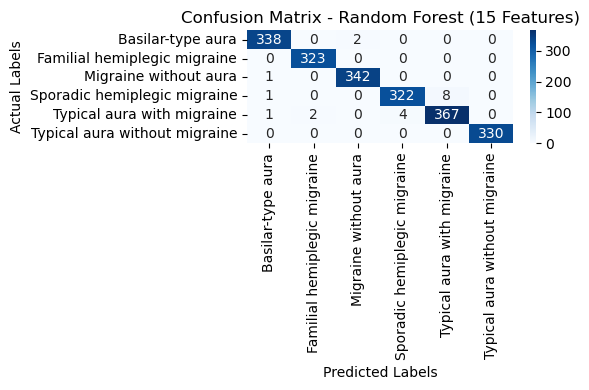

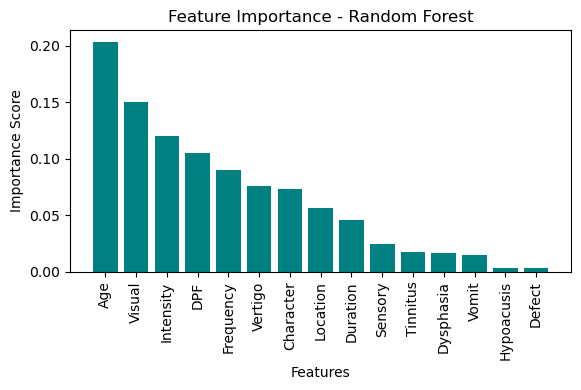


🔮 You can either enter values manually or use defaults for a migraine type.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# ===============================
# Load Model and Utilities
# ===============================
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

with open("selected_features.pkl", "rb") as f:
    selected_features = pickle.load(f)

print("✅ Model, Scaler, Encoder, and Features loaded successfully!")

# ===============================
# Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest (15 Features)', fontsize=12)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

# ===============================
# Feature Importance
# ===============================
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(6, 4))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], color='teal')
    plt.xticks(range(len(feature_importances)),
               [selected_features[i] for i in sorted_idx],
               rotation=90)
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()

# ===============================
# Migraine Information
# ===============================
migraine_info = {
    "Basilar-Type Aura": [
        "Originates from the brainstem, involving disturbances like vertigo, dysarthria, or double vision.",
        "Commonly affects both sides of the body, unlike unilateral migraines.",
        "Often accompanied by visual and auditory hallucinations.",
        "Can lead to severe nausea and temporary loss of coordination.",
        "Considered one of the rare and complex migraine subtypes."
    ],
    "Familial Hemiplegic Migraine": [
        "A hereditary migraine type linked to genetic mutations (CACNA1A, ATP1A2, SCN1A genes).",
        "Causes temporary paralysis or weakness on one side of the body during an attack.",
        "Often associated with aura symptoms such as speech difficulties or vision loss.",
        "Can last from several hours to days, with gradual recovery.",
        "Typically diagnosed through family medical history and genetic testing."
    ],
    "Migraine Without Aura": [
        "The most prevalent migraine subtype worldwide.",
        "Characterized by pulsating headaches, nausea, photophobia, and phonophobia.",
        "Triggers include stress, hormonal changes, lack of sleep, or dietary factors.",
        "Lacks any preceding neurological warning signs (aura).",
        "Duration ranges from 4 to 72 hours if untreated."
    ],
    "Sporadic Hemiplegic Migraine": [
        "Shares similar clinical symptoms with familial hemiplegic migraine.",
        "Occurs without any familial or genetic background.",
        "Involves unilateral motor weakness or paralysis during an attack.",
        "Neurological symptoms usually resolve completely after the episode.",
        "Diagnosis is confirmed after excluding secondary neurological causes."
    ],
    "Typical Aura With Migraine": [
        "Begins with visual or sensory aura such as flashing lights or tingling sensations.",
        "Aura symptoms usually precede headache by 20–60 minutes.",
        "The headache phase follows, often on one side of the head.",
        "Common triggers include bright light exposure and emotional stress.",
        "Usually resolves within a few hours to a day."
    ],
    "Typical Aura Without Migraine": [
        "Presence of aura symptoms without subsequent headache.",
        "Often mistaken for transient ischemic attacks or other neurological events.",
        "Involves visual disturbances like zig-zag patterns or blind spots.",
        "Episodes last less than 60 minutes, with full recovery afterward.",
        "Occurs more commonly in individuals with a history of migraine with aura."
    ]
}

# ===============================
# Default Profiles
# ===============================
default_profiles = {
    "Basilar-Type Aura": [32, 2, 1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    "Familial Hemiplegic Migraine": [21, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    "Migraine Without Aura": [35, 2, 4, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Sporadic Hemiplegic Migraine": [21, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Typical Aura With Migraine": [32, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    "Typical Aura Without Migraine": [26, 1, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0]
}

# Normalize labels for mapping
def _normalize_label(s: str) -> str:
    return re.sub(r'[^0-9a-z]', '', s.lower())

normalized_info_map = {_normalize_label(k): v for k, v in migraine_info.items()}

# ===============================
# Prediction Function
# ===============================
def predict_migraine():
    print("\n🔮 You can either enter values manually or use defaults for a migraine type.")
    choice = input("Do you want to use default values? (yes/no): ").strip().lower()

    if choice == "yes":
        print("\nAvailable migraine types:")
        for i, t in enumerate(default_profiles.keys(), 1):
            print(f"{i}. {t}")
        selected = input("\nEnter migraine type (exact name): ").strip()

        if selected in default_profiles:
            user_input = default_profiles[selected]
            print(f"\n✅ Using default values for {selected}: {user_input}")
        else:
            print("⚠️ Invalid type. Please enter values manually.")
            user_input = [float(input(f"Enter value for {feat}: ")) for feat in selected_features]
            selected = "Manual Entry"
    else:
        user_input = [float(input(f"Enter value for {feat}: ")) for feat in selected_features]
        selected = "Manual Entry"

    # Scale and Predict
    input_scaled = scaler.transform([user_input])
    pred_encoded = best_model.predict(input_scaled)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    # Show Results
    print(f"\n🧠 Input Profile Type: {selected}")
    print(f"✅ Predicted Migraine Type: {pred_label}")

    if pred_label.lower() == selected.lower():
        print("🎯 Model prediction matches the selected profile.")
    else:
        print("⚠️ Model prediction differs from selected profile — possible overlap or model confusion.")

    # Display correct info even if prediction mismatched
    norm_pred = _normalize_label(pred_label)
    info = normalized_info_map.get(norm_pred)

    if info:
        print(f"\n📘 Information about {pred_label}:")
        for i, point in enumerate(info, 1):
            print(f"{i}. {point}")
    else:
        print("\n⚠️ No detailed information available for this migraine type.")

    return pred_label

# ===============================
# Run Prediction
# ===============================
result = predict_migraine()
